<h1><center><font color='Purple'> IDS : Pima Indians Diabetes Assignment - 1 </font></center></h1>
<h1><center><font color='Purple'> Group No : 271 </font></center></h1>
<h1><center><font color='Purple'>   R A Bharat | Kulkarni Nishant Mohanrao | S Sumalatha </font></center></h1>

In [73]:
#Read Files 
import sys 
import pandas as pd
import numpy as np
import seaborn as sns 
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

<b><center><font color='Blue'>1.  Descriptive Analytics</font></center></b>

<b><font color='purple'>1a. Read Diabetes data set </font></b>

In [148]:
diabetes_df = pd.read_csv('diabetes.csv')
print("Features of Pima Indians Diabetes  ")
diabetes_df.head()

Features of Pima Indians Diabetes  


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<b><font color='purple'>1b. Describe  Diabetes data set </font></b>

In [149]:
#Statistical Description of the data 

print(diabetes_df.describe())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

<b><font color='purple'>1c. Fetch Unique  value counts for Diabetes data set </font></b>

In [76]:

print("Unique DataFrame values :\n",diabetes_df.nunique(),"\n")

Unique DataFrame values :
 Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64 



<b><font color='purple'>1d. Counts of  Diabetes outcome  </font></b>

Outcome Diabetes count Outcome
0    500
1    268
dtype: int64


<AxesSubplot:xlabel='Outcome'>

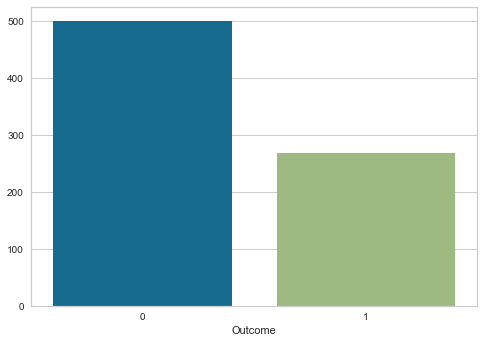

In [77]:
#WIne Quality counts 

result = diabetes_df.groupby(['Outcome']).size()

#Print the result 
print("Outcome Diabetes count", result)
 
# plot the result
sns.barplot(x = result.index, y = result.values)


<b><font color='blue'> Relationship between Age and BMI stats </font></b>

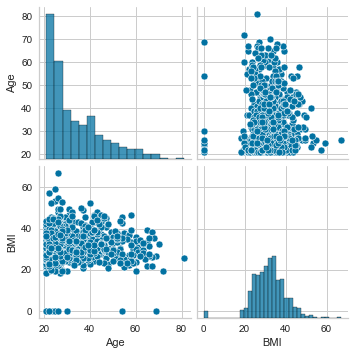

In [78]:

df = diabetes_df[['Age','BMI']]

sns.pairplot(df, kind="scatter")
plt.show()

<b><font color='purple'>1e. What are the mean, standard deviation and outlier values for Age Variable </font></b>

In [79]:
#On Age :
print("Mean of Age feature is : ",diabetes_df["Age"].mean())
print("Standard Deviation of Age feature is : ",diabetes_df["Age"].std())
print("outlier for Age feature are  : ")
print("\n Outlier < min    Outlier > max ")
print("\n ------------------------------ ")

import numpy as np
for x in ['Age']:
    q75,q25 = np.percentile(diabetes_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    print(diabetes_df.loc[diabetes_df[x] < min,x])
    print(diabetes_df.loc[diabetes_df[x] > max,x])

Mean of Age feature is :  33.240885416666664
Standard Deviation of Age feature is :  11.76023154067868
outlier for Age feature are  : 

 Outlier < min    Outlier > max 

 ------------------------------ 
Series([], Name: Age, dtype: int64)
123    69
363    67
453    72
459    81
489    67
537    67
666    70
674    68
684    69
Name: Age, dtype: int64


<b><font color='purple'>1f. What are the mean, standard deviation and outlier values for BMI Variable </font></b>

In [80]:
#On BMI :
print("Mean of BMI feature is : ",diabetes_df["BMI"].mean())
print("Standar Deviation  of BMI feature is : ",diabetes_df["BMI"].std())
print("Outlier for BMI feature are  : ")
print("\n Outlier < min    Outlier > max ")
print("\n ------------------------------ ")

import numpy as np
for x in ['BMI']:
    q75,q25 = np.percentile(diabetes_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    print(diabetes_df.loc[diabetes_df[x] < min,x])
    print(diabetes_df.loc[diabetes_df[x] > max,x])

Mean of BMI feature is :  31.992578124999977
Standar Deviation  of BMI feature is :  7.8841603203754405
Outlier for BMI feature are  : 

 Outlier < min    Outlier > max 

 ------------------------------ 
9      0.0
49     0.0
60     0.0
81     0.0
145    0.0
371    0.0
426    0.0
494    0.0
522    0.0
684    0.0
706    0.0
Name: BMI, dtype: float64
120    53.2
125    55.0
177    67.1
193    52.3
247    52.3
303    52.9
445    59.4
673    57.3
Name: BMI, dtype: float64


<b><font color='purple'>1g. Box plot Outcome vs Rest of columns to determine outliers  </font></b>

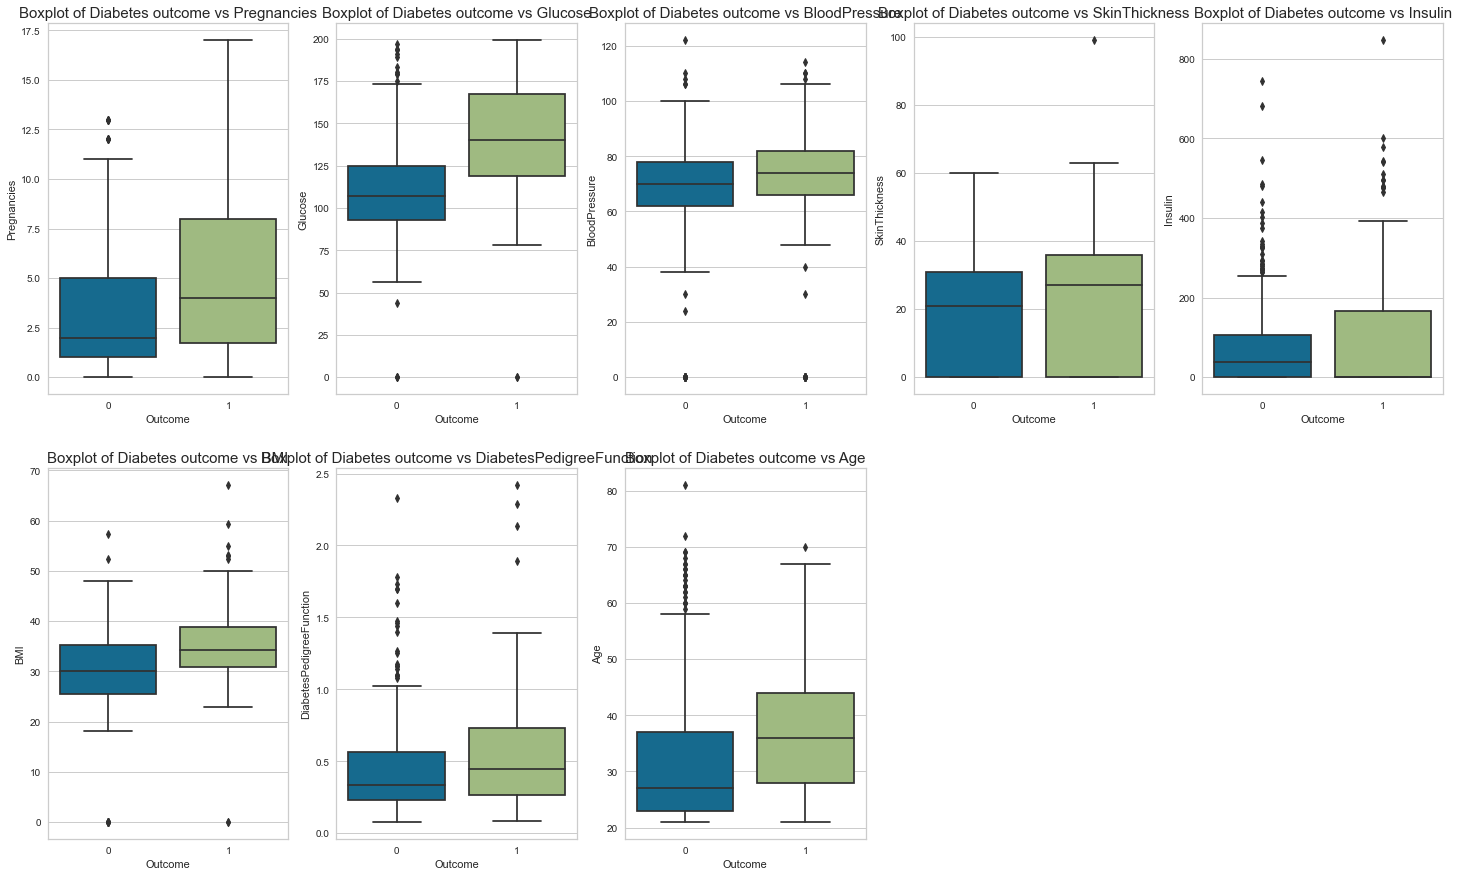

In [81]:
plt.figure(figsize=(25,15))
x_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',  'BMI',
          'DiabetesPedigreeFunction','Age']
y_cols = ['Outcome']
for i, col in enumerate(x_cols, start=1):
    
    plt.subplot(2,5,i)
    
    title_text = "Boxplot of Diabetes outcome vs "+col
    plt.title(title_text, fontsize=15)
    
    sns.boxplot(x=diabetes_df['Outcome'], y=diabetes_df[col])


<b><center><font color='blue'>2. Diagnostic Analytics   </font></center></b>

In [ ]:
The Pearson correlation coefficient measures the linear association between variables. 
Its value can be interpreted like so:

+1 - Complete positive correlation
+0.8 - Strong positive correlation
+0.6 - Moderate positive correlation
0 - no correlation whatsoever
-0.6 - Moderate negative correlation
-0.8 - Strong negative correlation
-1 - Complete negative correlation

Incase, two features have very high correlation implies that they are more linearly dependent
and hence have almost the same effect on the dependent variable. So, when two features have high 
correlation, we can drop one of the two features. Based on this, the feature selection would be done.


<b><font color='purple'>2a. Run Correlation Pearson analysis on entire  data set  </font></b>

In [82]:
from scipy import stats
correlation = diabetes_df.corr(method='pearson')
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<AxesSubplot:>

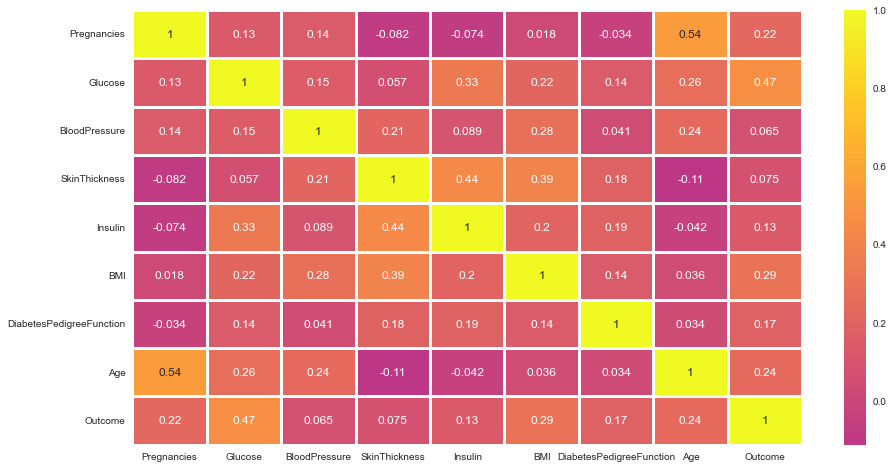

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
sns.heatmap(correlation, cmap="plasma",center = 0,linewidths=3,annot=True,
           xticklabels = correlation.columns, yticklabels = correlation.columns)

<b><font color='purple'>2b. Correlationn between SkinThickness and Insulin </font></b>

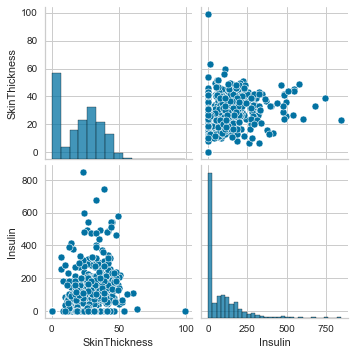

In [84]:

df = diabetes_df[['SkinThickness','Insulin']]

sns.pairplot(df, kind="scatter")
plt.show()

<b><font color='blue'>Explain the correlation between BMI and BloodPressure variables (positive, negative or neutral).
</font></b>

<b><font color='purple'>2c. Correlation between BMI and BloodPressure </font></b>

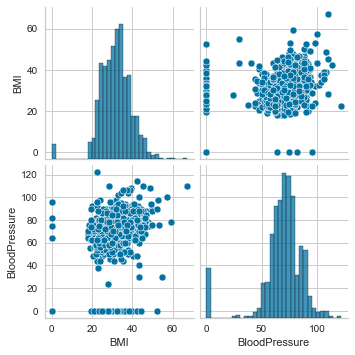

In [85]:

df = diabetes_df[['BMI','BloodPressure']]

sns.pairplot(df, kind="scatter")
plt.show()

#BMI vs BloodPressure 
<b><font color='blue'> Incase, two features have very high correlation implies that they are more 
linearly dependent and hence have almost the same effect on the dependent variable. 
So, when two features have high correlation, we can drop one of the two features.
Based on this, the feature selection would be done.In this case, BMI  and
Blood Pressure  have a moderate positive correlation of 0.24, which means that these features are should be 
considered for model building.</font></b>

<b><center><font color='blue'>Data Processing </font></center></b>

In [150]:
#MinMax Normalization on DiabetesPedigreeFunction column as difference between min and max value for this column was more  
from sklearn.preprocessing import MinMaxScaler
X = np.array(diabetes_df['DiabetesPedigreeFunction']).reshape(-1,1)
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
diabetes_df['DiabetesPedigreeFunction'] = X_scaled.reshape(1,-1)[0]
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.234415,50,1
1,1,85,66,29,0,26.6,0.116567,31,0
2,8,183,64,0,0,23.3,0.253629,32,1
3,1,89,66,23,94,28.1,0.038002,21,0
4,0,137,40,35,168,43.1,0.943638,33,1


<b><font color='purple'>Check for null record counts for entire dataset </font></b>

In [151]:
#Check On nulls and determining the %

print("Null Statistics on the entire Data set :\n",diabetes_df.isna().sum())
print("Null % Statistics on the entire Data set :\n",diabetes_df.isna().sum()/len(diabetes_df)*100)

Null Statistics on the entire Data set :
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Null % Statistics on the entire Data set :
 Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


<b><font color='purple'>Transforming all Outier values of Insulin Features to Null  </font></b>

In [152]:
import numpy as np
for x in ['Insulin']:
    q75,q25 = np.percentile(diabetes_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    diabetes_df.loc[diabetes_df[x] < min,x] = np.nan
    diabetes_df.loc[diabetes_df[x] > max,x] = np.nan

<b><font color='purple'>Transforming all Outlier values of BMI features to Null </font></b>

In [153]:
import numpy as np
for x in ['BMI']:
    q75,q25 = np.percentile(diabetes_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    diabetes_df.loc[diabetes_df[x] < min,x] = np.nan
    diabetes_df.loc[diabetes_df[x] > max,x] = np.nan

<b><font color='purple'>Transforming all outlier values of Pregnancies feature to Null </font></b>

In [154]:

import numpy as np
for x in ['Pregnancies']:
    q75,q25 = np.percentile(diabetes_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    diabetes_df.loc[diabetes_df[x] < min,x] = np.nan
    diabetes_df.loc[diabetes_df[x] > max,x] = np.nan

<b><font color='purple'>Check Null check on Diabetes dataset after  outlier converted to Nulls for Insuline , BMI 
and Pregnancy Feautures </font></b>

In [155]:
#Check On nulls and determining the %

print("Null Statistics on the entire Data set :\n",diabetes_df.isna().sum())
print("Null % Statistics on the entire Data set :\n",diabetes_df.isna().sum()/len(diabetes_df)*100)

Null Statistics on the entire Data set :
 Pregnancies                  4
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                     34
BMI                         19
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64
Null % Statistics on the entire Data set :
 Pregnancies                 0.520833
Glucose                     0.000000
BloodPressure               0.000000
SkinThickness               0.000000
Insulin                     4.427083
BMI                         2.473958
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64


<b><font color='purple'>Transforming : replacing outliers values for Features Insulin , BMI and Pragnancy
    by mean value by imputing  </font></b>

In [156]:
#filling missing vaues by mean 

import numpy as np
from sklearn.impute import SimpleImputer

preprocessor = SimpleImputer(missing_values=np.nan, strategy='mean')
X = np.array(diabetes_df['Insulin']).reshape(-1,1)
preprocessor.fit(X)
X_prep = preprocessor.transform(X)
diabetes_df['Insulin_univariate'] = X_prep.reshape(1,-1)[0]



preprocessor = SimpleImputer(missing_values=np.nan, strategy='mean')
X = np.array(diabetes_df['BMI']).reshape(-1,1)
preprocessor.fit(X)
X_prep = preprocessor.transform(X)
diabetes_df['BMI_univariate'] = X_prep.reshape(1,-1)[0]


preprocessor = SimpleImputer(missing_values=np.nan, strategy='mean')
X = np.array(diabetes_df['Pregnancies']).reshape(-1,1)
preprocessor.fit(X)
X_prep = preprocessor.transform(X)
diabetes_df['Pregnancies_univariate'] = X_prep.reshape(1,-1)[0]
diabetes_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_univariate,BMI_univariate,Pregnancies_univariate
0,6.0,148,72,35,0.0,33.6,0.234415,50,1,0.0,33.6,6.0
1,1.0,85,66,29,0.0,26.6,0.116567,31,0,0.0,26.6,1.0
2,8.0,183,64,0,0.0,23.3,0.253629,32,1,0.0,23.3,8.0
3,1.0,89,66,23,94.0,28.1,0.038002,21,0,94.0,28.1,1.0
4,0.0,137,40,35,168.0,43.1,0.943638,33,1,168.0,43.1,0.0


In [157]:
#Check On nulls and determining the %

print("Null Statistics on the entire Data set :\n",diabetes_df.isna().sum())
print("Null % Statistics on the entire Data set :\n",diabetes_df.isna().sum()/len(diabetes_df)*100)

Null Statistics on the entire Data set :
 Pregnancies                  4
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                     34
BMI                         19
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
Insulin_univariate           0
BMI_univariate               0
Pregnancies_univariate       0
dtype: int64
Null % Statistics on the entire Data set :
 Pregnancies                 0.520833
Glucose                     0.000000
BloodPressure               0.000000
SkinThickness               0.000000
Insulin                     4.427083
BMI                         2.473958
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
Insulin_univariate          0.000000
BMI_univariate              0.000000
Pregnancies_univariate      0.000000
dtype: float64


<b><font color='purple'>Creating new dataset with dropped Outlier records </font></b>

In [158]:

diabetes_drop_df = diabetes_df.dropna(axis = 0)
print("Null Statistics on the  Data set after removing outliers :\n",diabetes_drop_df.isna().sum())
print("Null Statistics on the  Data set after setting outliers to NaN:\n",diabetes_df.isna().sum())

Null Statistics on the  Data set after removing outliers :
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Insulin_univariate          0
BMI_univariate              0
Pregnancies_univariate      0
dtype: int64
Null Statistics on the  Data set after setting outliers to NaN:
 Pregnancies                  4
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                     34
BMI                         19
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
Insulin_univariate           0
BMI_univariate               0
Pregnancies_univariate       0
dtype: int64


<b><center><font color='blue'>3.Predictive Analytics </font></center></b>

<b><center><font color='blue'>Approach :1 - Predictive Analytics for removed outlier records </font></center></b>

<b><font color='purple'> Building model with outlier removed dataset for Insulin,BMI and Pregnancies  </font></b>

In [159]:
### Defining X and Y for Model ,Train-Test Split u
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import r2_score
X=diabetes_drop_df[[ 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',  'BMI',
          'DiabetesPedigreeFunction','Age' ]]

y=diabetes_drop_df['Outcome']
print(X.shape)
print(y.shape)


(712, 8)
(712,)


<b><font color='purple'>Function for classification metric  </font></b>

In [160]:
def get_classification_metric(testy, probs):
    from sklearn.metrics import precision_recall_curve
    precision, recall, thresholds = precision_recall_curve(testy, probs)
    # convert to f score
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    return fscore[ix]

<b><font color='purple'>70/30 split  </font></b>

In [161]:
#decision Tree 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.03)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(690, 8) (690,)
(22, 8) (22,)


<b><font color='purple'>Fit Model</font></b>

In [162]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# providing the inputs for the scalling purpose
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [163]:
from sklearn.tree import DecisionTreeClassifier

# entropy means information gain
classifer = DecisionTreeClassifier(criterion='entropy', random_state=0)

# providing the training dataset
classifer.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

<b><font color='purple'>Predicting Test data set </font></b>

In [164]:
y_pred = classifer.predict(X_test)

<b><font color='purple'>3a. What is the overall accuracy of the decision tree model for outlier removed dataset</font></b>

In [165]:
from sklearn.metrics import accuracy_score

# accuracy
accuracy_score(y_pred,y_test)

0.7727272727272727

<b><font color='purple'>Building Decision Tree plot for Training dataset </font></b>

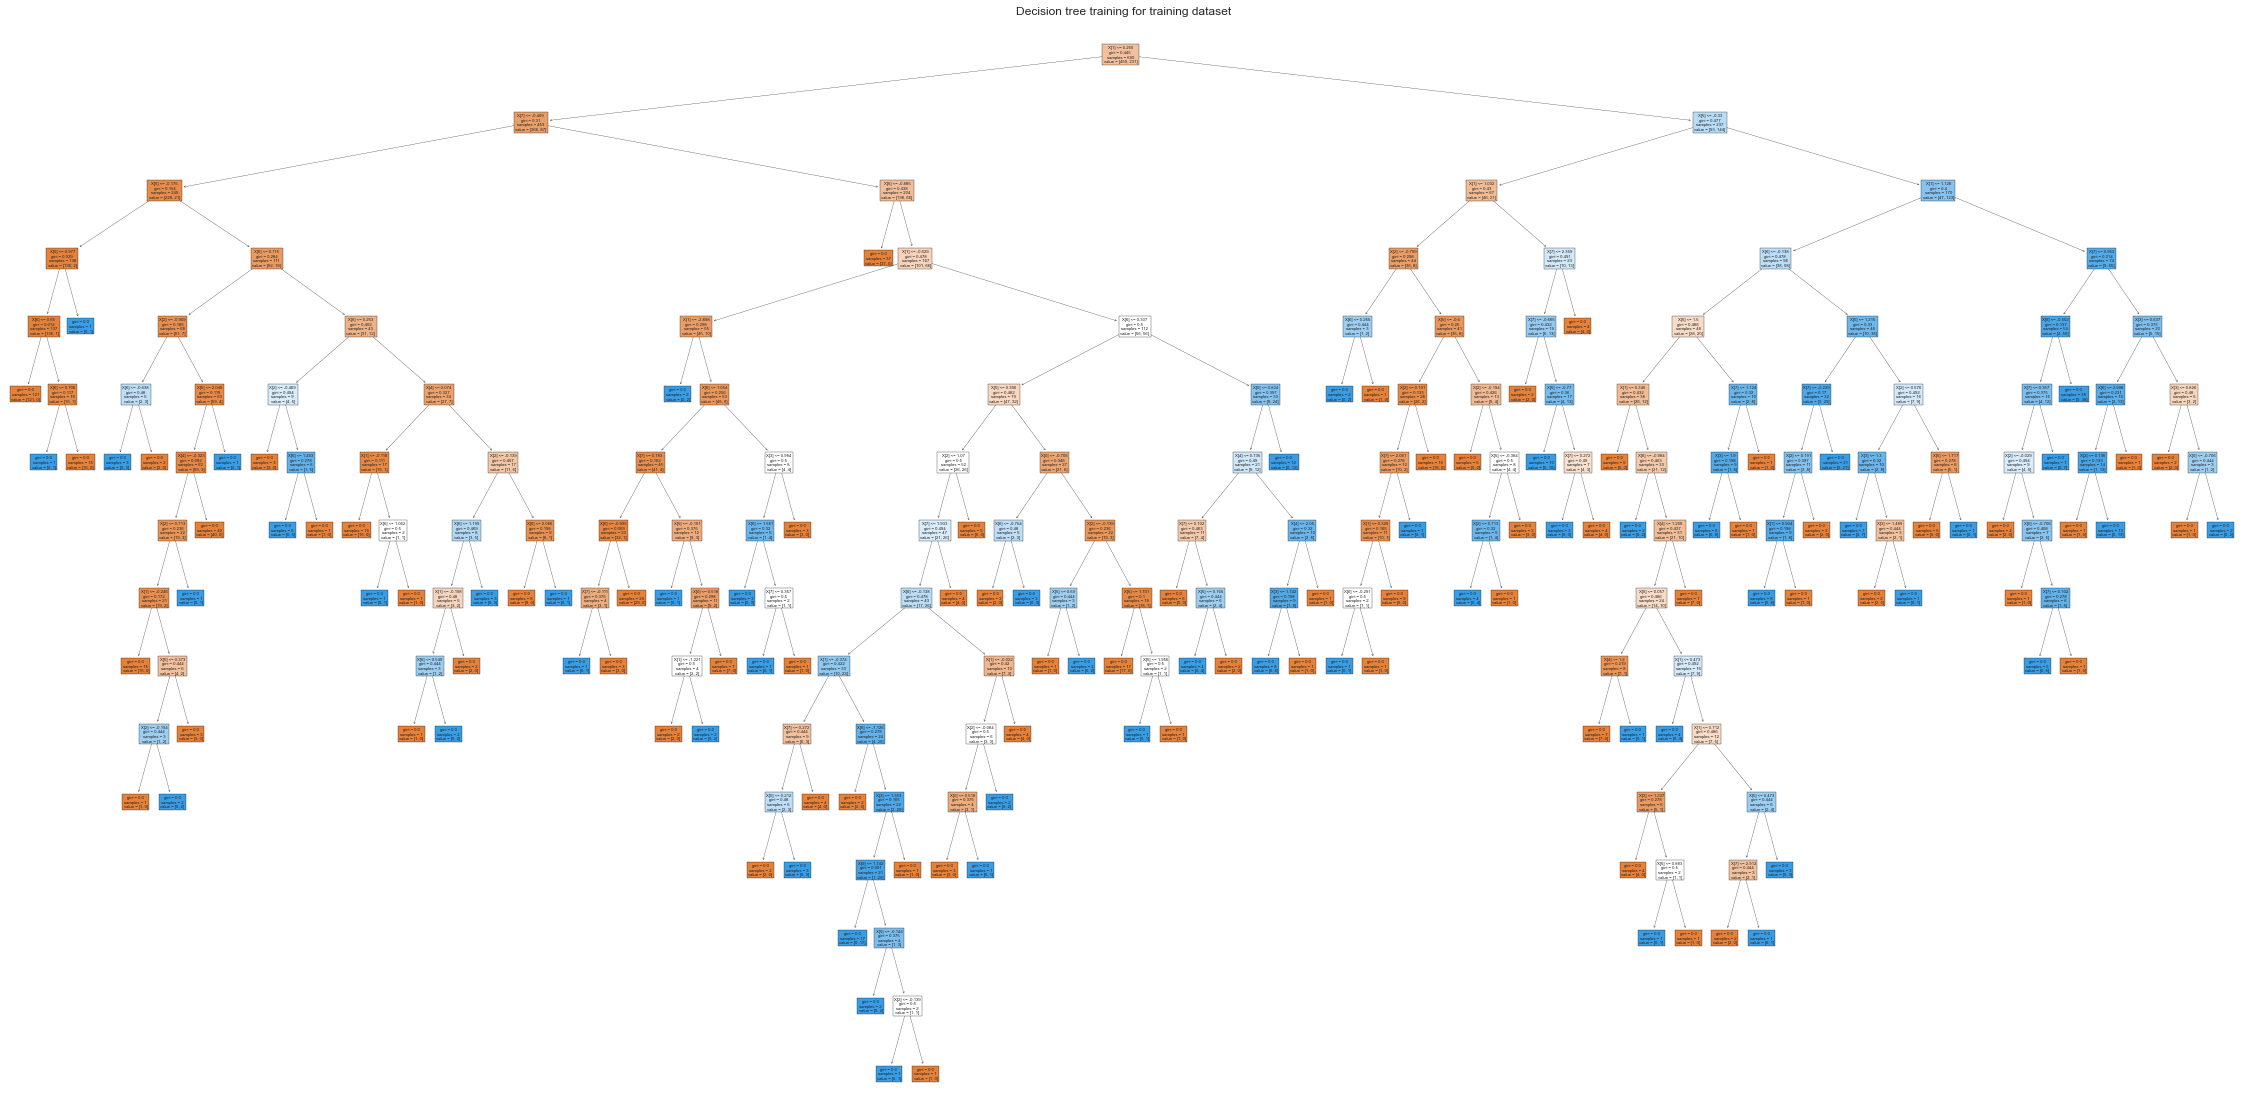

In [166]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()

# output size of decision tree
plt.figure(figsize=(40,20))

# providing the training dataset
clf = clf.fit(X_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree training for training dataset")
plt.show()

<b><font color='purple'>Building Decision Tree plot for test dataset </font></b>

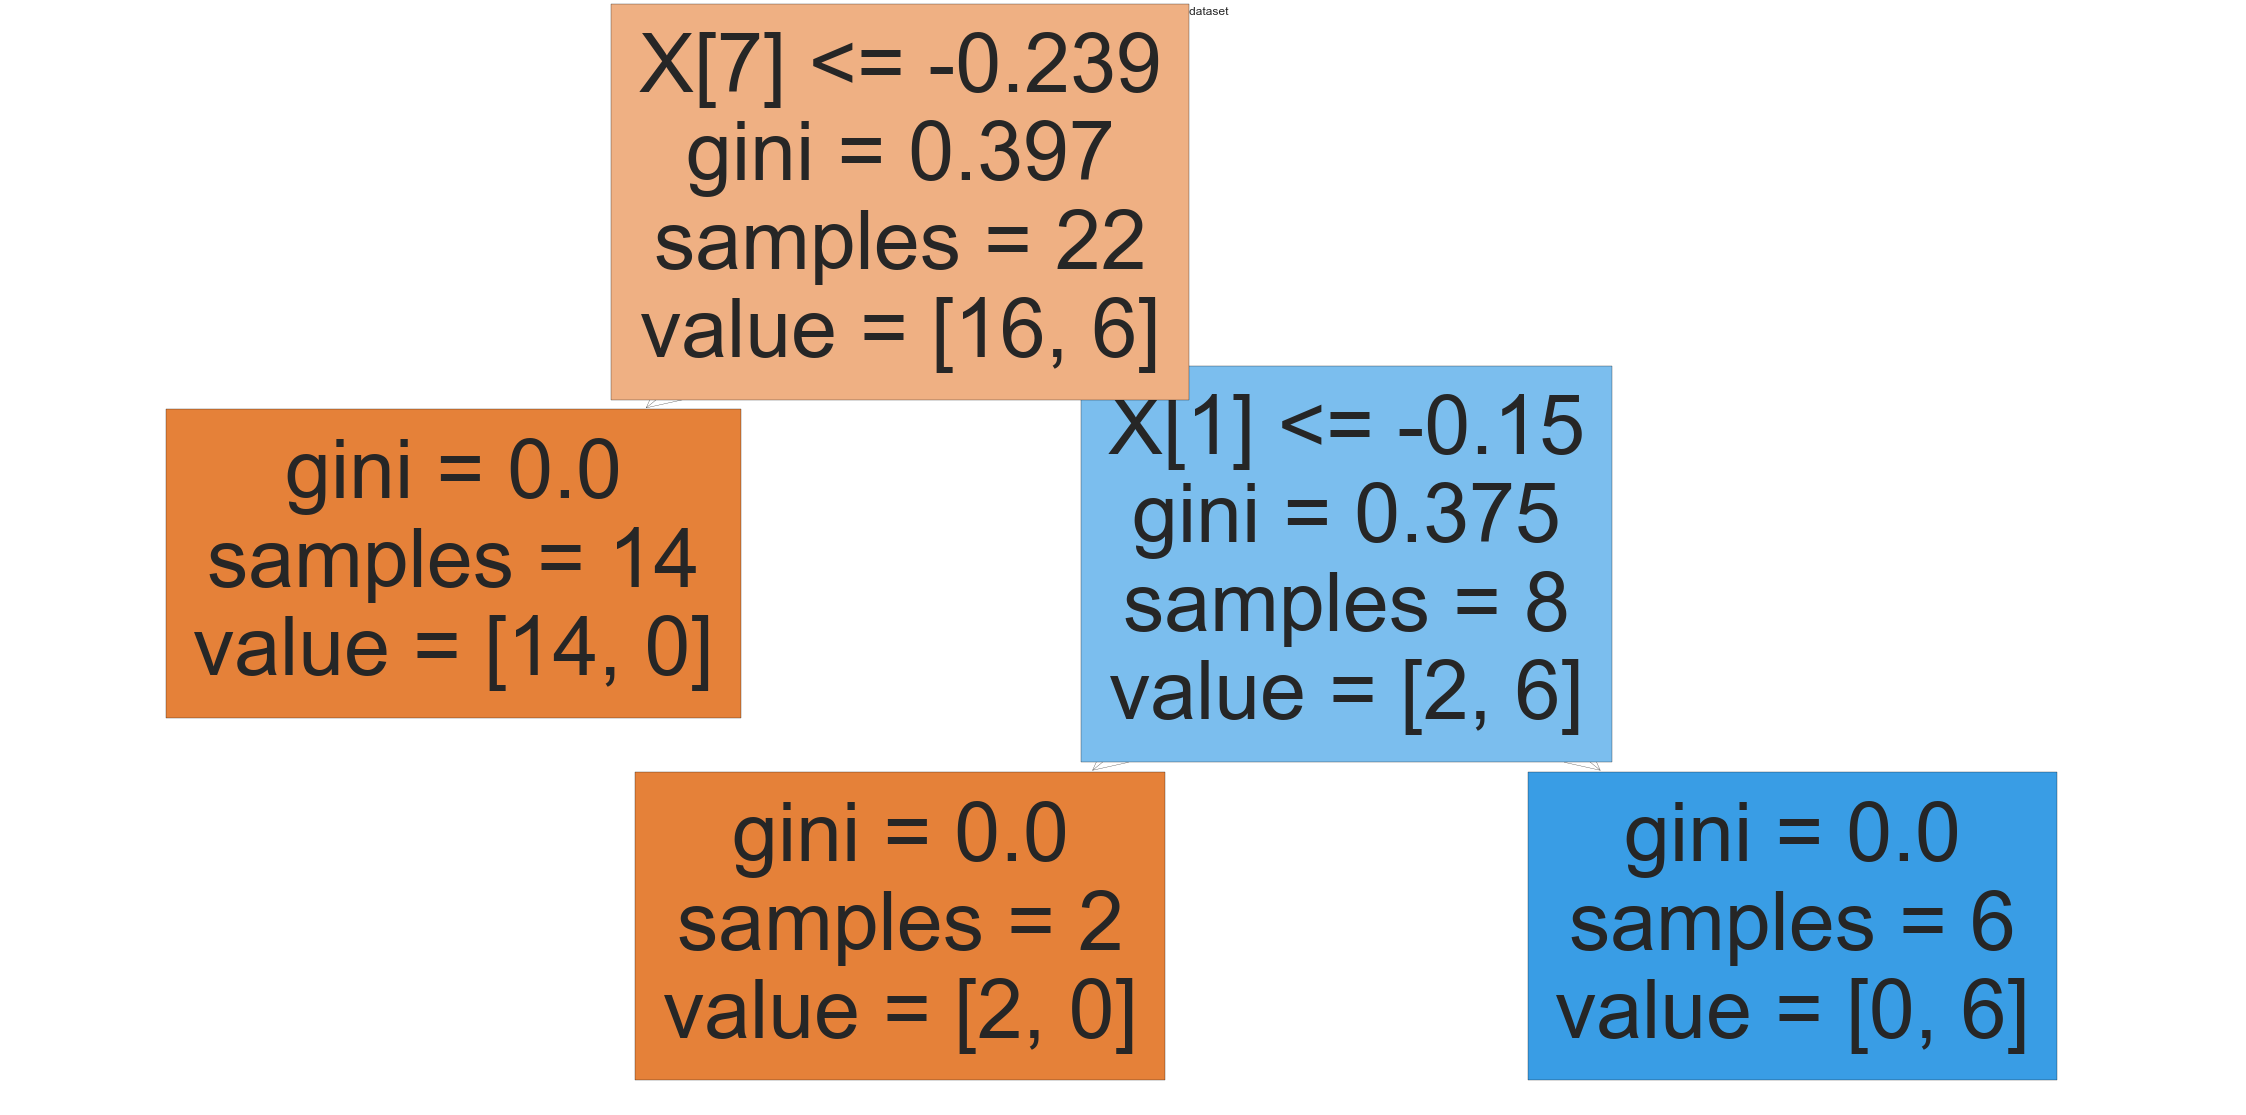

In [168]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()

# output size of decision tree
plt.figure(figsize=(40,20))

# providing the training dataset
clf = clf.fit(X_test, y_test)
plot_tree(clf, filled=True)
plt.title("Decision tree training for testing dataset")
plt.show()

<b><font color='purple'>3b. Write the confusion matrix. Discuss the implications of Type-I error and Type-II error in this example</font></b>

In [169]:
threshold =0.5
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

decision_pred = np.where(y_pred > threshold, 1, 0)

decisioncmatrix = confusion_matrix(y_test, decision_pred)
print("Confusion Matrix:\n",decisioncmatrix,"\n")
tn,fp,fn,tp=decisioncmatrix.ravel()
print("Confusion Matrix value for TN,FP,FN,TP are :",tn,",",fp,",",fn,",",tp)

Confusion Matrix:
 [[13  3]
 [ 2  4]] 

Confusion Matrix value for TN,FP,FN,TP are : 13 , 3 , 2 , 4


<b><font color='purple'>3c. What are the Precision, Recall, F1 score, and Error Rate values based on the confusion matrix?</font></b>

Accuracy : 
 0.7727272727272727 

Classification report for decision Tree classifier for features which has removed outlier records :

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.57      0.67      0.62         6

    accuracy                           0.77        22
   macro avg       0.72      0.74      0.73        22
weighted avg       0.79      0.77      0.78        22



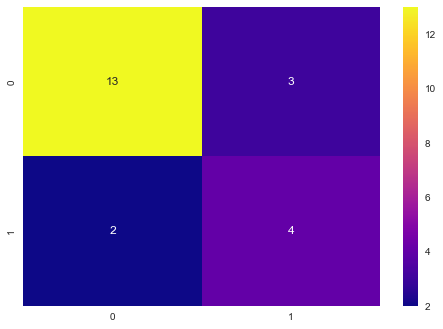

In [170]:


print ("Accuracy : \n", accuracy_score(y_test, y_pred),"\n")

sns.heatmap(decisioncmatrix,cmap="plasma",annot=True)
print("Classification report for decision Tree classifier for features which has removed outlier records :\n")
print("+"*60)
print(classification_report(y_test,y_pred))



<b><center><font color='blue'>Approach :2 - Predictive Analytics by transforming outlier values by using mean  </font></center></b>

<b><font color='purple'>buildind Model  </font></b>

In [171]:
##Approach 2 , using data features whoes outliers are replaced by mean 
XX=diabetes_df[[ 'Pregnancies_univariate', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin_univariate',  'BMI_univariate',
          'DiabetesPedigreeFunction','Age' ]]
yy=diabetes_df['Outcome']
xx_train,xx_test,yy_train,yy_test=train_test_split(XX,yy,test_size=0.03)
print(xx_train.shape,yy_train.shape)
print(xx_test.shape,yy_test.shape)

(744, 8) (744,)
(24, 8) (24,)


<b><font color='purple'>Fit Model </font></b>

In [172]:
#providing the inputs for the scalling purpose
xx_train = sc.fit_transform(xx_train)
xx_test = sc.transform(xx_test)

from sklearn.tree import DecisionTreeClassifier

# entropy means information gain
xclassifer = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [173]:
# providing the training dataset
xclassifer.fit(xx_train,yy_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

<b><font color='purple'>3a. Accuracy of model </font></b>

In [174]:
yy_pred = xclassifer.predict(xx_test)
# accuracy
print("Accuracy of decision Tree for features where  outlier are tansformed to mean value is :",accuracy_score(yy_pred,yy_test))

Accuracy of decision Tree for features where  outlier are tansformed to mean value is : 0.8333333333333334


<b><font color='purple'>Building Decision Tree plot for Training data set  </font></b>

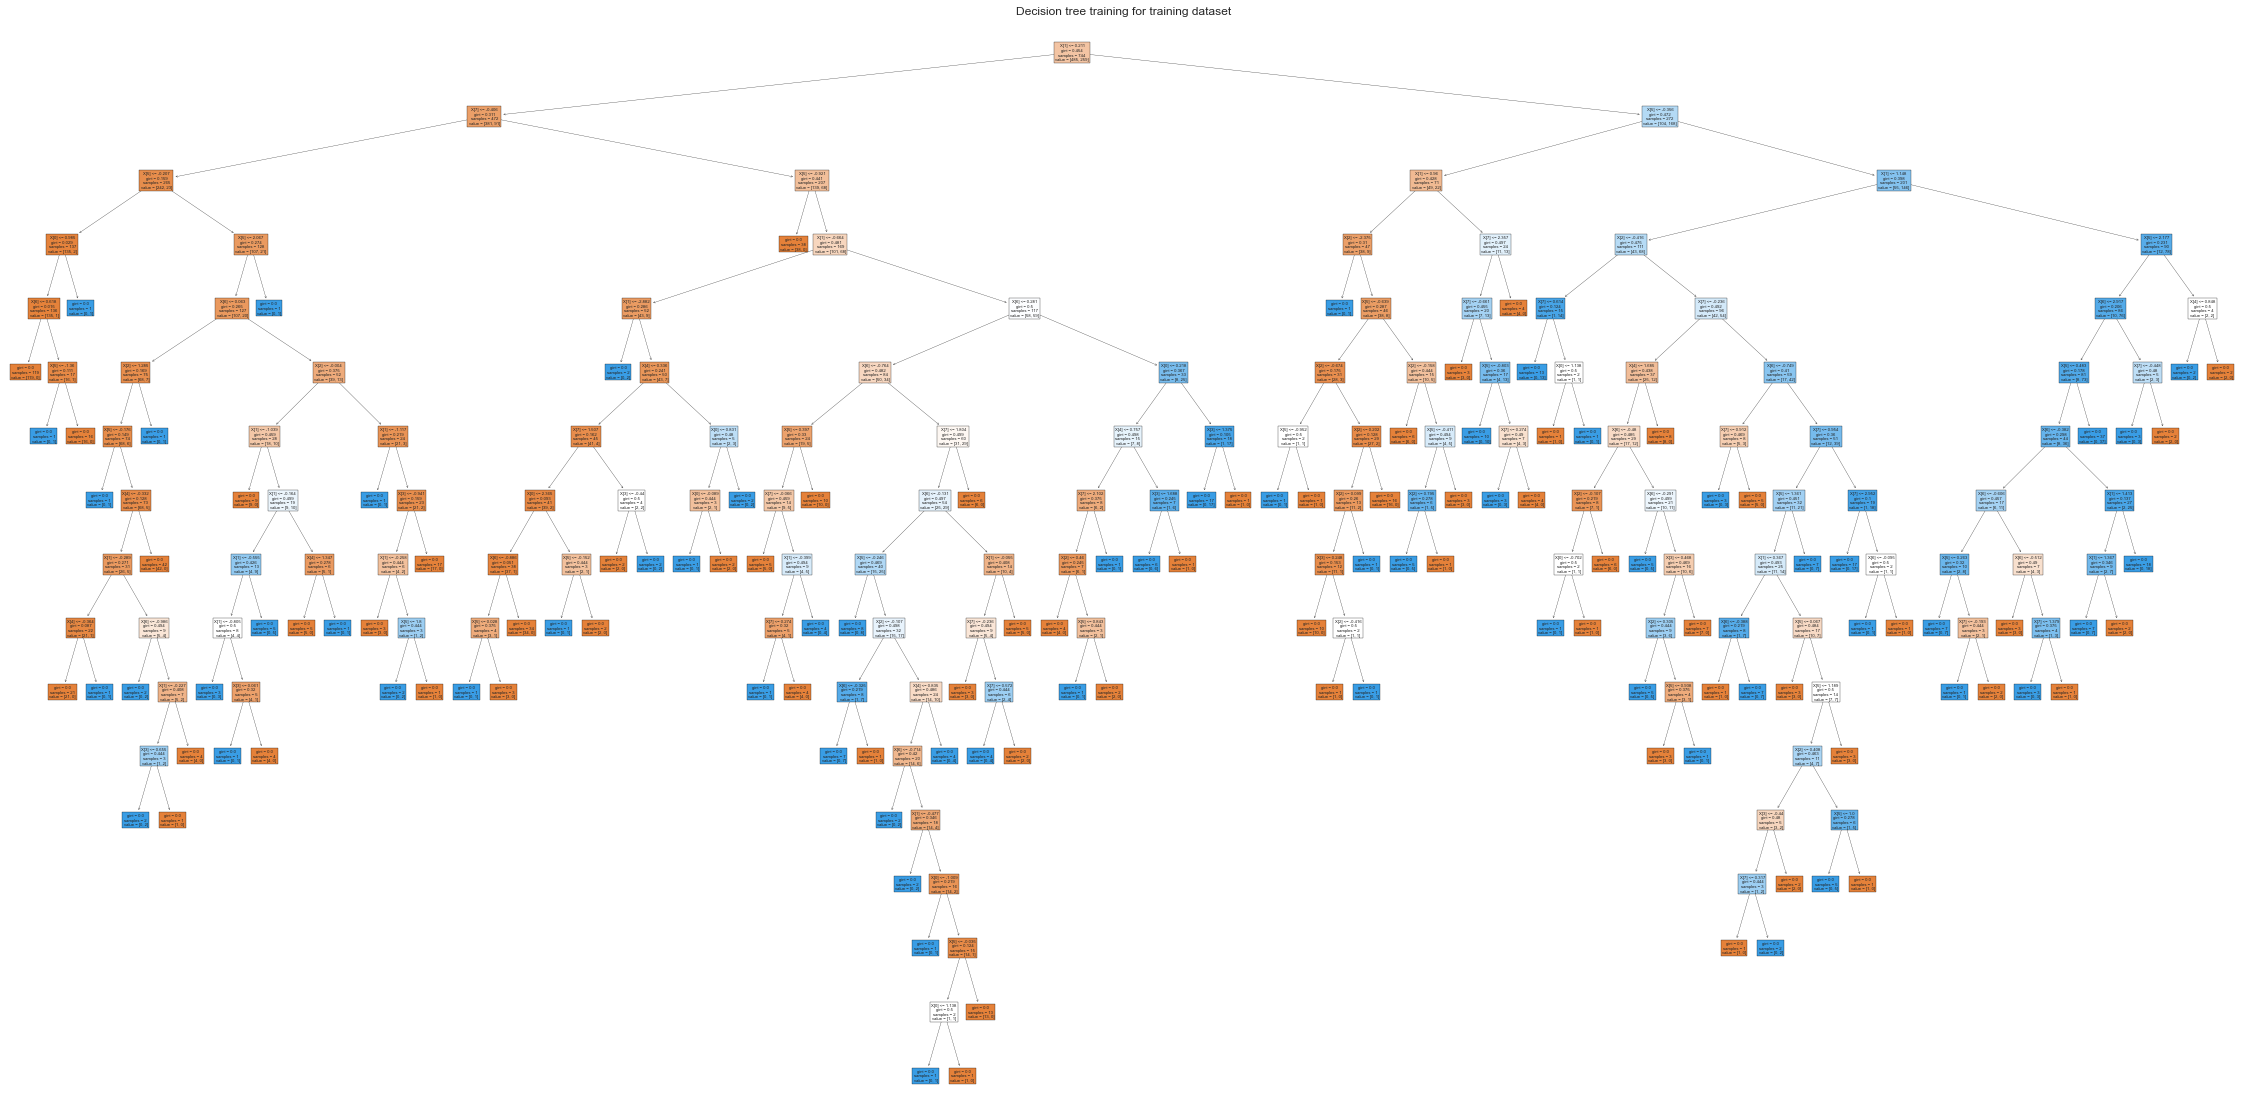

In [175]:
xclf = DecisionTreeClassifier()

# output size of decision tree
plt.figure(figsize=(40,20))

# providing the training dataset
xclf = xclf.fit(xx_train, yy_train)
plot_tree(xclf, filled=True)
plt.title("Decision tree training for training dataset")
plt.show()

<b><font color='purple'>Building the Decision tree plot for Test data set  </font></b>

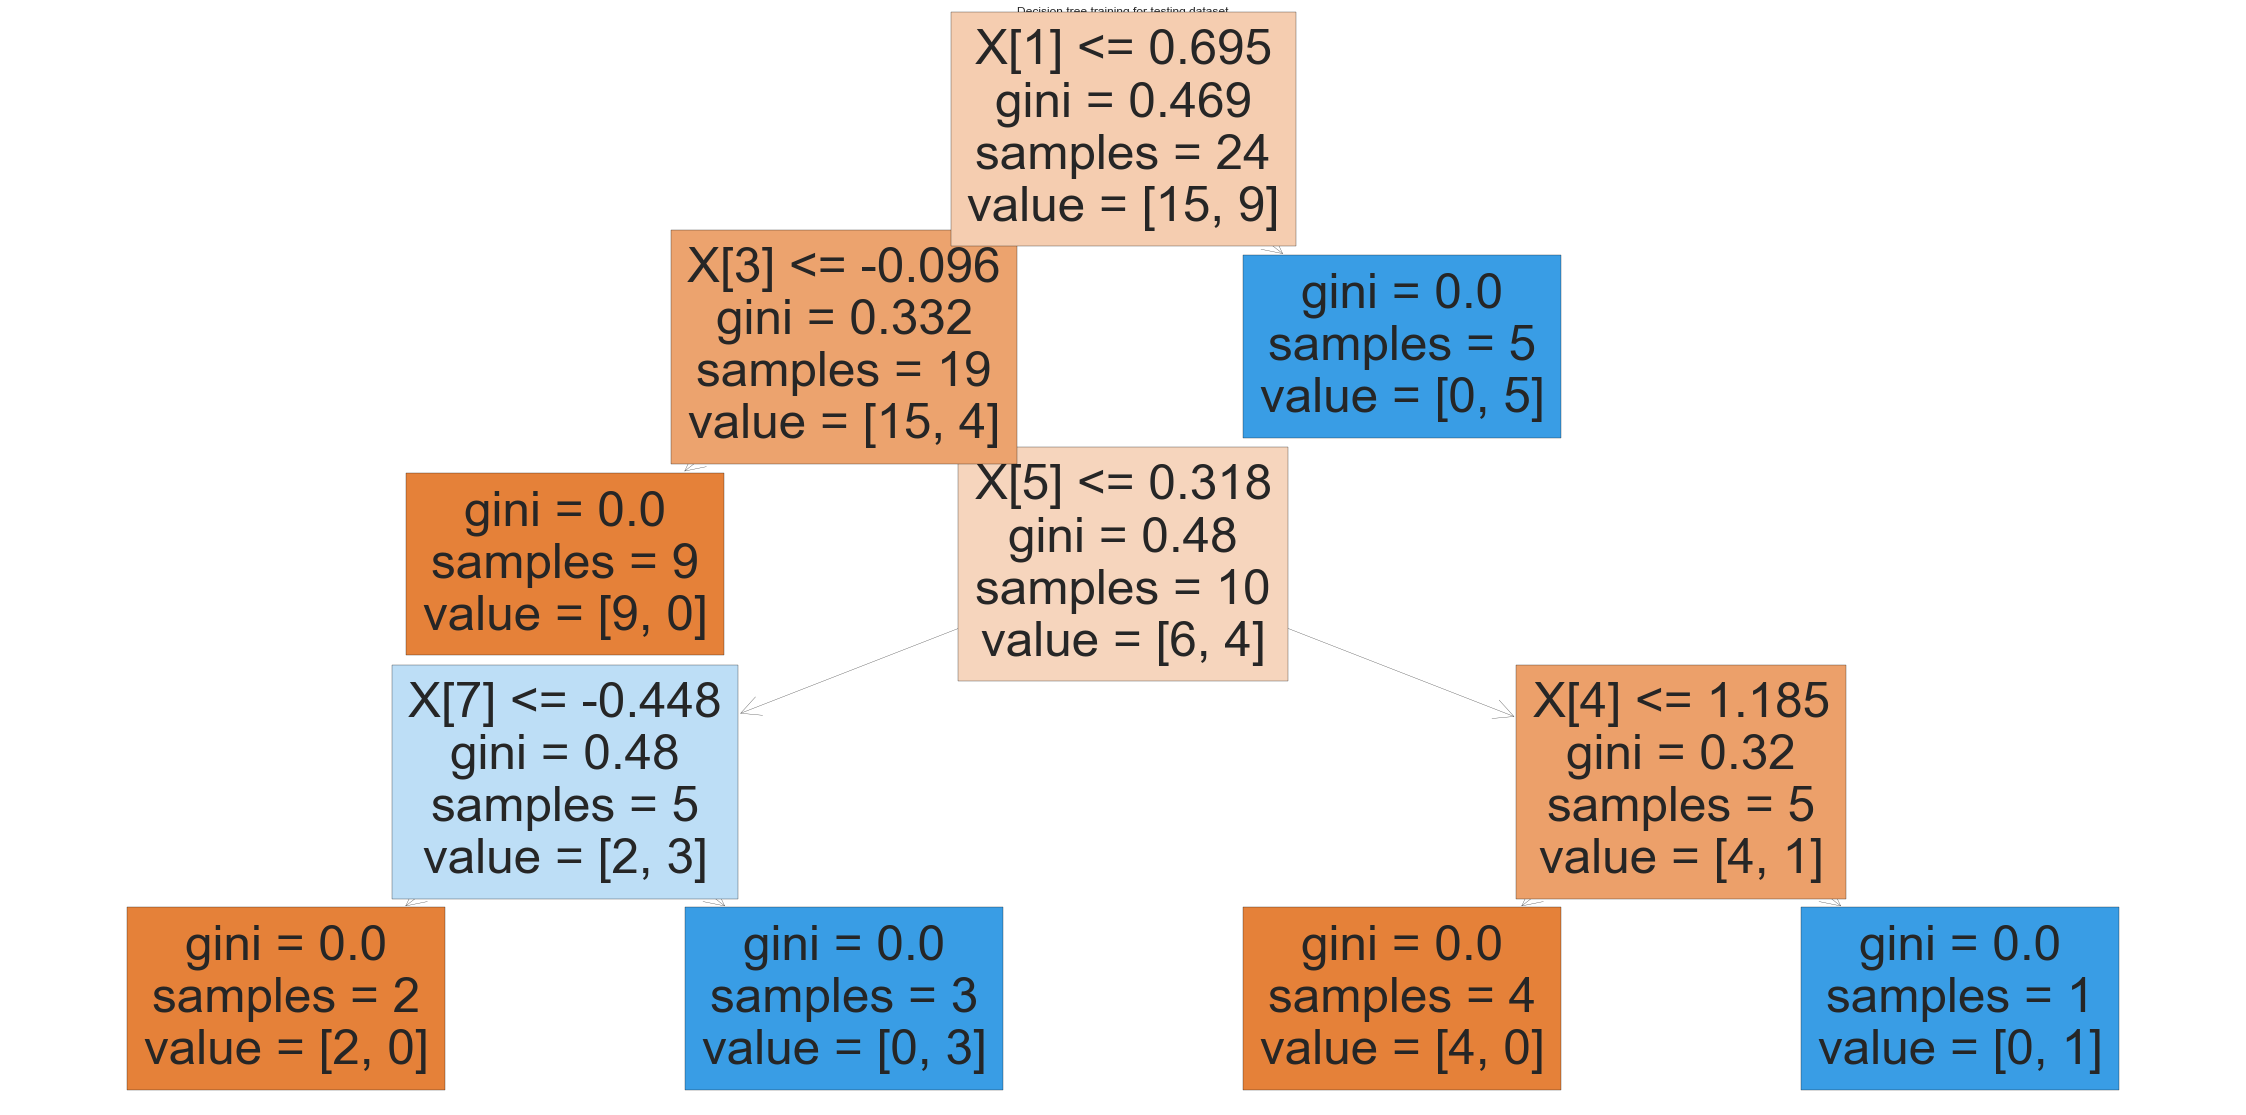

In [176]:
yclf = DecisionTreeClassifier()

# output size of decision tree
plt.figure(figsize=(40,20))

# providing the training dataset
yclf = yclf.fit(xx_test, yy_test)
plot_tree(yclf, filled=True)
plt.title("Decision tree training for testing dataset")
plt.show()

<b><font color='purple'>3b. Write the confusion matrix. Discuss the implications of Type-I error and Type-II error in this example</font></b>

In [177]:
threshold =0.5


xdecision_pred = np.where(yy_pred > threshold, 1, 0)

xdecisioncmatrix = metrics.confusion_matrix(yy_test, xdecision_pred)
print("Confusion Matrix:\n",xdecisioncmatrix,"\n")
tn,fp,fn,tp=xdecisioncmatrix.ravel()
print("Confusion Matrix value for TN,FP,FN,TP are :",tn,",",fp,",",fn,",",tp)

Confusion Matrix:
 [[14  1]
 [ 3  6]] 

Confusion Matrix value for TN,FP,FN,TP are : 14 , 1 , 3 , 6


<b><font color='purple'>3c. What are the Precision, Recall, F1 score, and Error Rate values based on the confusion matrix?</font></b>

Accuracy : 
 0.8333333333333334 

Classification report for decision Tree classifier which features whoes outlier are transformed to mean values :

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        15
           1       0.86      0.67      0.75         9

    accuracy                           0.83        24
   macro avg       0.84      0.80      0.81        24
weighted avg       0.84      0.83      0.83        24



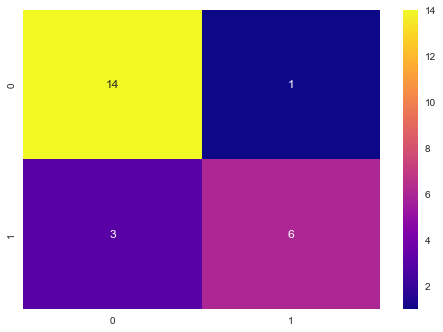

In [178]:
## 
from sklearn.metrics import classification_report
print ("Accuracy : \n", accuracy_score(yy_test, yy_pred),"\n")

sns.heatmap(xdecisioncmatrix,cmap="plasma",annot=True)
print("Classification report for decision Tree classifier which features whoes outlier are transformed to mean values :\n")
print("+"*60)
print(classification_report(yy_test,yy_pred))


<b><font color='purple'> Depicting Actual vs Prediced Values for Decision Tree </font></b>

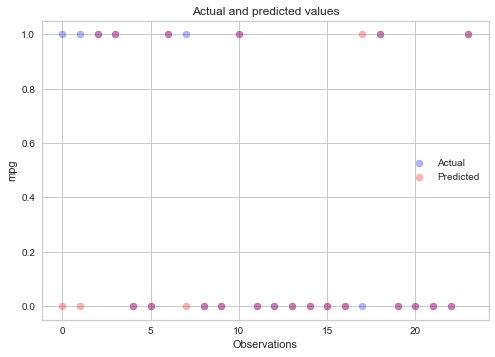

In [179]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, yy_test.size), y=yy_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, yy_pred.size), y=yy_pred, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('mpg')
plt.legend()
plt.show()

<b><font color='purple'> Calculating error </font></b>

Root Squared Mean Error for Decision tree is : 0.408248290463863


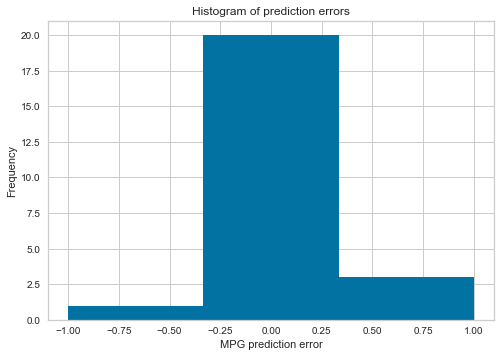

In [180]:
#conda install -c districtdatalabs yellowbrick
#RMSE
from math import sqrt
from sklearn.metrics import mean_squared_error
diff = yy_test - yy_pred
diff.hist(bins = 3)
plt.title('Histogram of prediction errors')
plt.xlabel('MPG prediction error')
plt.ylabel('Frequency')


print("Root Squared Mean Error for Decision tree is :",sqrt(mean_squared_error(yy_test, yy_pred)))

<b><font color='purple'> Lasso Prediction of error </font></b>

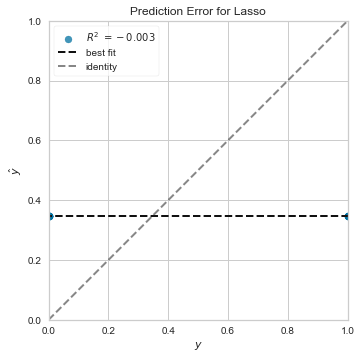

<AxesSubplot:title={'center':'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [181]:
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(xx_train, yy_train)  # Fit the training data to the visualizer
visualizer.score(xx_test, yy_test)  # Evaluate the model on the test data
#visualizer.score(yy_test, yy_pred)  # Evaluate the model on the test data
visualizer.show()    

f score: 0.5454545454545454
Confusion Matrix:
 [[12  3]
 [ 5  4]] 

Accuracy : 
 0.6666666666666666 

Classification report for GradientBoostingClassifier:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
              precision    recall  f1-score   support

           0       0.71      0.80      0.75        15
           1       0.57      0.44      0.50         9

    accuracy                           0.67        24
   macro avg       0.64      0.62      0.62        24
weighted avg       0.66      0.67      0.66        24



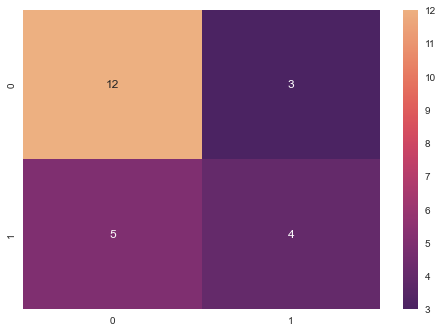

In [188]:
##predicting using XgBoost with limited 


from sklearn.ensemble import GradientBoostingClassifier
modellim = GradientBoostingClassifier()
modellim.fit(xx_train,yy_train)
threshold =0.5
y_predGl=modellim.predict(xx_test)

y_predGBl = np.where(y_predGl > threshold, 1, 0)

fsGl=get_classification_metric(yy_test,y_predGBl)

print("f score:",fsGl)
cmG = confusion_matrix(yy_test, y_predGBl)
print("Confusion Matrix:\n",cmG,"\n")
print ("Accuracy : \n", accuracy_score(yy_test, y_predGBl),"\n")

sns.heatmap(cmG,cmap="flare_r",annot=True)
print("Classification report for GradientBoostingClassifier:\n")
print("+"*60)
print(classification_report(yy_test,y_predGBl))

<b><font color='blue'><center> Ensambling Modelling</center> </font></b>

<b><center><font color='blue'>Approach :1 - Predictive Analytics for removed outlier records using random forest ensembler method </font></center></b>

In [183]:
# example of evaluating a random forest ensemble for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# create the synthetic classification dataset
XX=diabetes_drop_df[[ 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',  'BMI',
          'DiabetesPedigreeFunction','Age' ]]

yy=diabetes_drop_df['Outcome']

model = RandomForestClassifier(n_estimators=50)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the ensemble on the dataset using the resampling method
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report ensemble performance
print('Approach 1 (Feature 1 - with Dropped outliers) :Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Approach 1 (Feature 1 - with Dropped outliers) :Mean Accuracy: 0.758 (0.055)


<b><center><font color='blue'>Approach :2 - Predictive Analytics for  transformed outlier records using random forest ensembler method </font></center></b>

In [185]:
# example of evaluating a random forest ensemble for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# create the synthetic classification dataset
X =diabetes_df[[ 'Pregnancies_univariate', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin_univariate',  'BMI_univariate',
          'DiabetesPedigreeFunction','Age' ]]
y=diabetes_df['Outcome']
# configure the ensemble model
model = RandomForestClassifier(n_estimators=50)
# configure the resampling method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the ensemble on the dataset using the resampling method
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report ensemble performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.757 (0.035)


<b><font color='blue'><center> Pipeline method : PCA >> Scaling >> DecisionTree Classifier for Feature 1 </center></font><b>

In [186]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
# pipe flow is :
# PCA(Dimension reduction to two) -> Scaling the data -> DecisionTreeClassification
pipe = Pipeline([('pca', PCA(n_components = 2)), ('std', StandardScaler()), ('decision_tree', DecisionTreeClassifier())], verbose = True)
 
# fitting the data in the pipe
pipe.fit(X_train, y_train)
 
# scoring data
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pipe.predict(X_test)))

[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.0s
[Pipeline] ..... (step 3 of 3) Processing decision_tree, total=   0.0s
0.7272727272727273


<b><center><font color='blue'>Feature 1 : Hyper-parameter tuning for removed outliers  </font><center></b1>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=7)
 
knn.fit(X_train, y_train)
 
# Predict on dataset which model has not seen before
print("Predicted values for y_test",knn.predict(X_test))
print("Score of the model is ",knn.score(X_test, y_test))

print(confusion_matrix(y_test, y_pred))
 
print(classification_report(y_test, y_pred))

In [192]:
for i in range(1, 15):
    # FIRST A QUICK COMPARISON TO OUR ORIGINAL K = 1
    knn = KNeighborsClassifier(n_neighbors = i)
 
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    print("--------------------------------------------------\n")
    print('WITH K = ',i)
    print('\n')
    print(confusion_matrix(y_test, pred))
    print('\n')
    print(classification_report(y_test, pred))
   
    

--------------------------------------------------

WITH K =  1


[[15  1]
 [ 2  4]]


              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.80      0.67      0.73         6

    accuracy                           0.86        22
   macro avg       0.84      0.80      0.82        22
weighted avg       0.86      0.86      0.86        22

--------------------------------------------------

WITH K =  2


[[15  1]
 [ 3  3]]


              precision    recall  f1-score   support

           0       0.83      0.94      0.88        16
           1       0.75      0.50      0.60         6

    accuracy                           0.82        22
   macro avg       0.79      0.72      0.74        22
weighted avg       0.81      0.82      0.81        22

--------------------------------------------------

WITH K =  3


[[13  3]
 [ 1  5]]


              precision    recall  f1-score   support

           0       0.93      0

<b><font color='blue'><center> Accuracy on Various feature and models </center></font><b>

In [195]:
 
from prettytable import PrettyTable

perfTable = PrettyTable(["Methods                                ", " Accuracy"])
perfTable.add_row(["Feature 1 : ML1 - Decision Tree classifier   ", round(accuracy_score(y_test, y_pred)*100,2)])
perfTable.add_row(["Feature 2 : ML1 - Decision Tree classifier   ", round(accuracy_score(yy_pred,yy_test)*100,2)])
perfTable.add_row(["Feature 1 : ML2 - Random Forest Ensembler    ", round(mean(n_scores)*100,2)])
perfTable.add_row(["Feature 2 : ML2 - Random Forest Ensembler    ", "75.3"])
perfTable.add_row(["Feature 2 : ML3 - GradientBoostingClassifier ", round(accuracy_score(yy_test, y_predGBl)*100,2)])
perfTable.add_row(["Feature 1 : ML1 - Pipeline DTC               ", round(accuracy_score(y_test, pipe.predict(X_test))*100,2)])
perfTable.add_row(["Feature 1 : Hyper Parameter tunning KNN:6,7,8", "94.0"])
 
print(perfTable)

+-----------------------------------------------+-----------+
|    Methods                                    |  Accuracy |
+-----------------------------------------------+-----------+
| Feature 1 : ML1 - Decision Tree classifier    |   77.27   |
| Feature 2 : ML1 - Decision Tree classifier    |   83.33   |
| Feature 1 : ML2 - Random Forest Ensembler     |   75.65   |
| Feature 2 : ML2 - Random Forest Ensembler     |    75.3   |
| Feature 2 : ML3 - GradientBoostingClassifier  |   66.67   |
| Feature 1 : ML1 - Pipeline DTC                |   72.73   |
| Feature 1 : Hyper Parameter tunning KNN:6,7,8 |    94.0   |
+-----------------------------------------------+-----------+
